<a href="https://colab.research.google.com/github/oGubo/CheckBoxLanchonete/blob/main/Ciencia%20de%20dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from google.colab import files

sns.set_style('whitegrid')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
from google.colab import files

print("Selecione as 3 planilhas para upload:")
uploaded = files.upload()

# Carregar planilhas (Excel)
df_transacoes = pd.read_excel("PicMoney-Base_de_Transa__es_-_Cupons_Capturados-100000 linhas (1).xlsx")
df_lojas = pd.read_excel("PicMoney-Massa_de_Teste_com_Lojas_e_Valores-10000 linhas (1).xlsx")
df_pedestres = pd.read_excel("PicMoney-Base_Simulada_-_Pedestres_Av__Paulista-100000 linhas (1).xlsx")

print("Arquivos carregados com sucesso!")
print("Transações:", df_transacoes.shape)
print("Lojas:", df_lojas.shape)
print("Pedestres:", df_pedestres.shape)

Selecione as 3 planilhas para upload:


Saving PicMoney-Base_Simulada_-_Pedestres_Av__Paulista-100000 linhas (1).xlsx to PicMoney-Base_Simulada_-_Pedestres_Av__Paulista-100000 linhas (1).xlsx
Saving PicMoney-Massa_de_Teste_com_Lojas_e_Valores-10000 linhas (1).xlsx to PicMoney-Massa_de_Teste_com_Lojas_e_Valores-10000 linhas (1).xlsx
Saving PicMoney-Base_de_Transa__es_-_Cupons_Capturados-100000 linhas (1).xlsx to PicMoney-Base_de_Transa__es_-_Cupons_Capturados-100000 linhas (1).xlsx
Arquivos carregados com sucesso!
Transações: (100001, 13)
Lojas: (10000, 11)
Pedestres: (100000, 15)


In [ ]:
def limpar_dados(df, nome_df):
    """
    Função que limpa os dados de um DataFrame.
    """
    print(f"--- Limpeza de Dados da Tabela: {nome_df} ---")

    # Verificando e removendo valores ausentes
    print("Valores ausentes antes da limpeza:")
    print(df.isnull().sum())

    # Removendo linhas com valores ausentes
    df_limpo = df.dropna()
    print("\nDataFrame após a remoção de valores ausentes:")
    print(df_limpo.isnull().sum())

    # Removendo linhas duplicadas
    linhas_duplicadas = df_limpo.duplicated().sum()
    if linhas_duplicadas > 0:
        print(f"\n{linhas_duplicadas} linhas duplicadas encontradas. Removendo...")
        df_limpo = df_limpo.drop_duplicates()
        print(f"Linhas duplicadas removidas. Total de linhas: {len(df_limpo)}")
    else:
        print("\nNenhuma linha duplicada encontrada.")

    # Convertendo colunas de data para o formato datetime
    if 'data' in df_limpo.columns:
        df_limpo['data'] = pd.to_datetime(df_limpo['data'], errors='coerce', dayfirst=True)
    if 'data_captura' in df_limpo.columns:
        df_limpo['data_captura'] = pd.to_datetime(df_limpo['data_captura'], errors='coerce', dayfirst=True)

    print("\nTipos de dados após a conversão:")
    print(df_limpo.dtypes)

    print(f"\nDados após a limpeza na tabela {nome_df}:")
    print(f"Linhas: {df_limpo.shape[0]} | Colunas: {df_limpo.shape[1]}")
    print("-" * 50)

    return df_limpo

# Aplique a função de limpeza a cada DataFrame e salve em novas variáveis
df_transacoes_limpo = limpar_dados(df_transacoes.copy(), "Transações")
df_lojas_limpo = limpar_dados(df_lojas.copy(), "Lojas")
df_pedestres_limpo = limpar_dados(df_pedestres.copy(), "Pedestres")

# Agora você pode começar a usar os DataFrames limpos

--- Limpeza de Dados da Tabela: Transações ---
Valores ausentes antes da limpeza:
celular                           1
data                              1
hora                              1
nome_estabelecimento              1
bairro_estabelecimento            1
categoria_estabelecimento         1
id_campanha                       1
id_cupom                          1
tipo_cupom                        1
produto                       66673
valor_cupom                       0
repasse_picmoney                  1
Unnamed: 12                  100000
dtype: int64

DataFrame após a remoção de valores ausentes:
celular                      0
data                         0
hora                         0
nome_estabelecimento         0
bairro_estabelecimento       0
categoria_estabelecimento    0
id_campanha                  0
id_cupom                     0
tipo_cupom                   0
produto                      0
valor_cupom                  0
repasse_picmoney             0
Unnamed: 12       

/tmp/ipython-input-4292637880.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpo['data'] = pd.to_datetime(df_limpo['data'], errors='coerce', dayfirst=True)



--- Análise da Tabela de Transações ---

Top 10 categorias de estabelecimento:
categoria_estabelecimento
Farmácias e Drogarias                            6816
Lojas de Móveis e Decoração                      3479
Igrejas e Lojas de Artigos Religiosos            3441
Clínicas de Saúde e Bem-estar                    3415
Restaurantes e Gastronomia                       3410
Papelarias, Livrarias e Lojas de Escritório      3399
Supermercados e Mercados Express                 3378
Coworkings e Centros de Estudo/Conexão           3375
Bancos e Casas Lotéricas                         3354
Espaços Culturais e de Experiência Interativa    3353
Name: count, dtype: int64


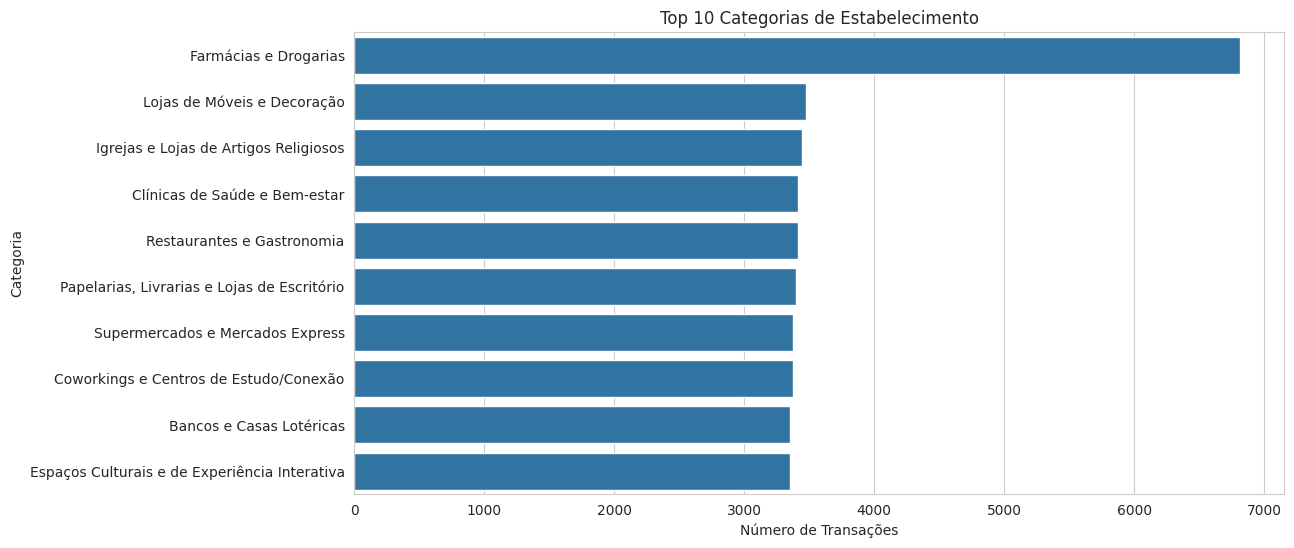


Resumo do repasse:
count   100000.00
mean        70.47
std         90.82
min          1.07
25%         16.18
50%         32.81
75%         80.16
max        497.32
Name: repasse_picmoney, dtype: float64


In [ ]:
# Análise Exploratória da Tabela de Transações
print("\n--- Análise da Tabela de Transações ---")

# Top 10 categorias de estabelecimento
print("\nTop 10 categorias de estabelecimento:")
print(df_transacoes['categoria_estabelecimento'].value_counts().head(10))

plt.figure(figsize=(12, 6))
sns.countplot(y="categoria_estabelecimento",
              data=df_transacoes,
              order=df_transacoes['categoria_estabelecimento'].value_counts().head(10).index)
plt.title("Top 10 Categorias de Estabelecimento")
plt.xlabel("Número de Transações")
plt.ylabel("Categoria")
plt.show()

# Estatísticas do repasse
print("\nResumo do repasse:")
print(df_transacoes['repasse_picmoney'].describe())


--- Análise da Tabela de Lojas ---

Estatísticas de Valor de Compra e Cupom:
       valor_compra  valor_cupom
count      10000.00     10000.00
mean         549.68        70.35
std          260.76        91.07
min          100.09         1.23
25%          323.38        16.13
50%          548.88        32.92
75%          776.26        79.82
max          999.92       492.57

Top 10 Lojas por Valor de Compra:
nome_loja
Havaianas            391276.05
Kalunga              379552.67
Ponto Frio           378106.00
Extra Mercado        377733.11
Drogaria São Paulo   373808.68
Pão de Açúcar        372890.60
Livraria Cultura     371353.43
Daiso Japan          369647.55
Riachuelo            368413.08
Fast Shop            362138.76
Name: valor_compra, dtype: float64


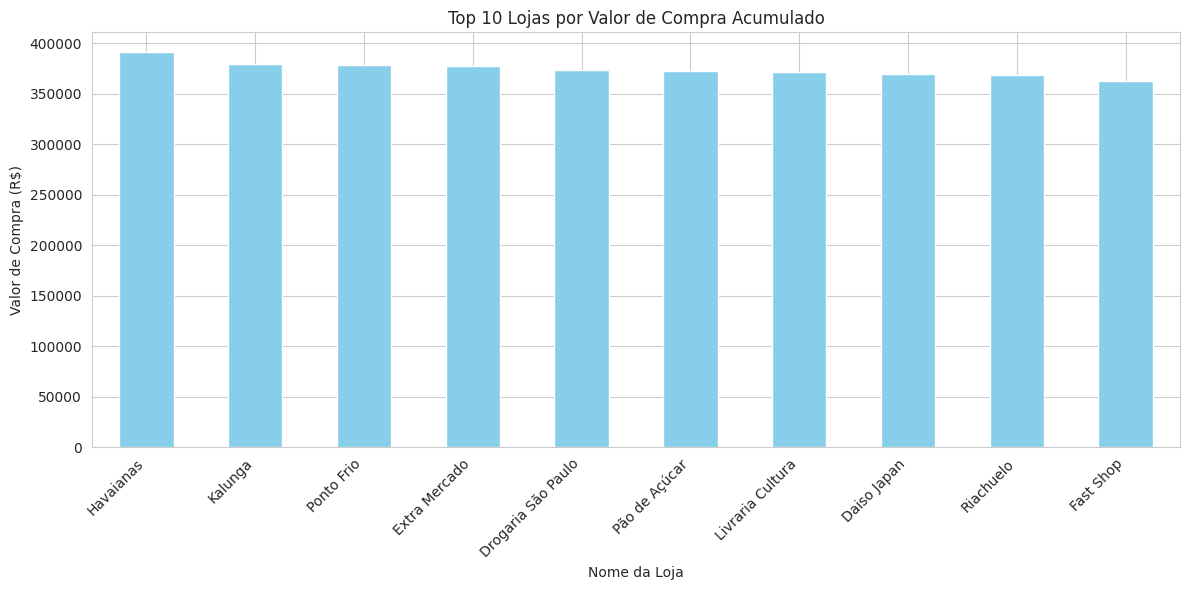

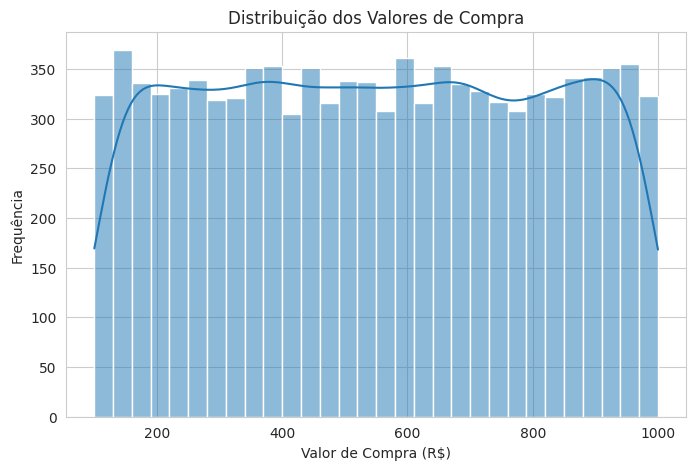

In [ ]:
# Análise Exploratória da Tabela de Lojas
print("\n--- Análise da Tabela de Lojas ---")

# Estatísticas descritivas dos valores de compra e cupom
print("\nEstatísticas de Valor de Compra e Cupom:")
print(df_lojas[['valor_compra', 'valor_cupom']].describe())

# Top 10 lojas por valor de compra
top_lojas_compra = df_lojas.groupby('nome_loja')['valor_compra'].sum().nlargest(10)
print("\nTop 10 Lojas por Valor de Compra:")
print(top_lojas_compra)

# Gráfico de barras das 10 lojas com maior valor de compra
plt.figure(figsize=(12, 6))
top_lojas_compra.plot(kind='bar', color='skyblue')
plt.title('Top 10 Lojas por Valor de Compra Acumulado')
plt.xlabel('Nome da Loja')
plt.ylabel('Valor de Compra (R$)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Distribuição do valor de compra
plt.figure(figsize=(8, 5))
sns.histplot(df_lojas['valor_compra'], bins=30, kde=True)
plt.title('Distribuição dos Valores de Compra')
plt.xlabel('Valor de Compra (R$)')
plt.ylabel('Frequência')
plt.show()

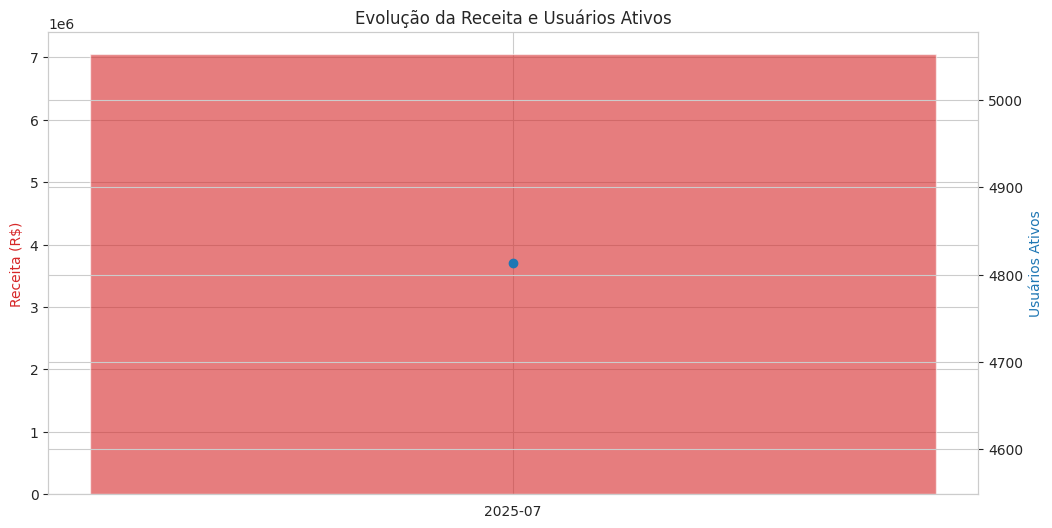

In [ ]:
# Evolução mensal da receita e usuários ativos
# Altere para usar o DataFrame LIMPO
df_transacoes['mes_ano'] = df_transacoes['data'].dt.to_period('M')

receita_mensal = df_transacoes.groupby('mes_ano')['repasse_picmoney'].sum().reset_index()
usuarios_ativos = df_transacoes.groupby('mes_ano')['celular'].nunique().reset_index()
usuarios_ativos.rename(columns={'celular': 'usuarios_ativos'}, inplace=True)

# Juntar
df_kpi = pd.merge(receita_mensal, usuarios_ativos, on="mes_ano")
df_kpi['mes_ano'] = df_kpi['mes_ano'].astype(str)

# Plot
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.bar(df_kpi['mes_ano'], df_kpi['repasse_picmoney'], color='tab:red', alpha=0.6, label="Receita")
ax1.set_ylabel("Receita (R$)", color="tab:red")

ax2 = ax1.twinx()
ax2.plot(df_kpi['mes_ano'], df_kpi['usuarios_ativos'], color="tab:blue", marker="o", label="Usuários Ativos")
ax2.set_ylabel("Usuários Ativos", color="tab:blue")

plt.title("Evolução da Receita e Usuários Ativos")
plt.xticks(rotation=45)
plt.show()